# Crop Health using Enhanced Vegetation Index

* **Products used:** 
[ s2_l2a](https://explorer.digitalearth.africa/s2_l2a)

## Background
[Enhanced Vegetation Index](https://kaflekrishna.com.np/blog-detail/enhanced-vegetation-index-evi-sentinel-2-image-google-earth-engine/#:~:text=The%20enhanced%20vegetation%20index%20(EVI,regions%20and%20improved%20vegetation%20monitoring.) (EVI) is similar to Normalized Difference Vegetation Index (NDVI) and can be used to quantify vegetation greenness. However, EVI corrects for some atmospheric conditions and canopy background noise and is more sensitive in areas with dense vegetation.

The Enhanced Vegetation Index (EVI) from Landsat, Sentinel-2 image is comparable to the Normalized Difference Vegetation Index (NDVI), and it quantifies the vegetation greenness. While the EVI is calculated in the same way as the NDVI, it accounts for some distortion in reflected light caused by airborne particles and the ground cover beneath the vegetation. When examining rainforests and other areas of the Earth with high levels of chlorophyll, the EVI data product does not get saturated as quickly as the NDVI.


Using Digital Earth Africa's archive of analysis-ready satellite data, we can easily calculate a wide range of EVI that can be used to assist in mapping and monitoring features like vegetation through time, or as inputs to machine learning or classification algorithms.


## Description
This notebook demonstrates how to:

1. Load Sentinel 2 images for an area of interest (AOI).
1. Calculate Enhanced Vegetation Index (EVI).
3. Visualise the Results.
 
***

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages

In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import xarray as xr

from deafrica_tools.datahandling import load_ard, mostcommon_crs
from deafrica_tools.plotting import rgb
from deafrica_tools.bandindices import calculate_indices

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='crop_health_evi')

## Create a query and load satellite data

The function will also automatically mask out clouds from the dataset, allowing us to focus on pixels that contain useful data.
It will also exclude images where more than 70% of the pixels are masked, which is set using the `min_gooddata` parameter in the `load_ard` call.

In [3]:
lat = 31.13907
lon = 31.41094

buffer = 0.02
# Create a reusable query
query = {
    'x': (lon-buffer, lon+buffer),
    'y': (lat+buffer, lat-buffer),
    'time': ('2022-07'),
    'resolution': (-10, 10)
}

# Identify the most common projection system in the input query
output_crs = mostcommon_crs(dc=dc, product='s2_l2a', query=query)

# Load available data from Sentinel-2 and filter to retain only times
# with at least 99% good data
ds = load_ard(dc=dc, 
              products=['s2_l2a'],
              min_gooddata=0.99, 
              measurements=['red', 'green', 'blue', 'nir'],
              output_crs=output_crs,
              **query)


Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Counting good quality pixels for each time step
Filtering to 6 out of 7 time steps with at least 99.0% good quality pixels
Applying pixel quality/cloud mask
Loading 6 time steps


In [4]:
display(ds)

<xarray.Dataset>
Dimensions:      (time: 6, y: 450, x: 388)
Coordinates:
  * time         (time) datetime64[ns] 2022-07-02T08:41:43 ... 2022-07-30T08:...
  * y            (y) float64 3.448e+06 3.448e+06 ... 3.444e+06 3.444e+06
  * x            (x) float64 3.466e+05 3.466e+05 ... 3.504e+05 3.504e+05
    spatial_ref  int32 32636
Data variables:
    red          (time, y, x) float32 366.0 309.0 180.0 241.0 ... nan nan nan
    green        (time, y, x) float32 378.0 489.0 536.0 579.0 ... nan nan nan
    blue         (time, y, x) float32 183.0 207.0 167.0 199.0 ... nan nan nan
    nir          (time, y, x) float32 874.0 2.039e+03 3.609e+03 ... nan nan nan
Attributes:
    crs:           EPSG:32636
    grid_mapping:  spatial_ref

### Plot the images to see what the area looks like
We can use the `rgb` function to plot the timesteps in our dataset as true colour RGB images:

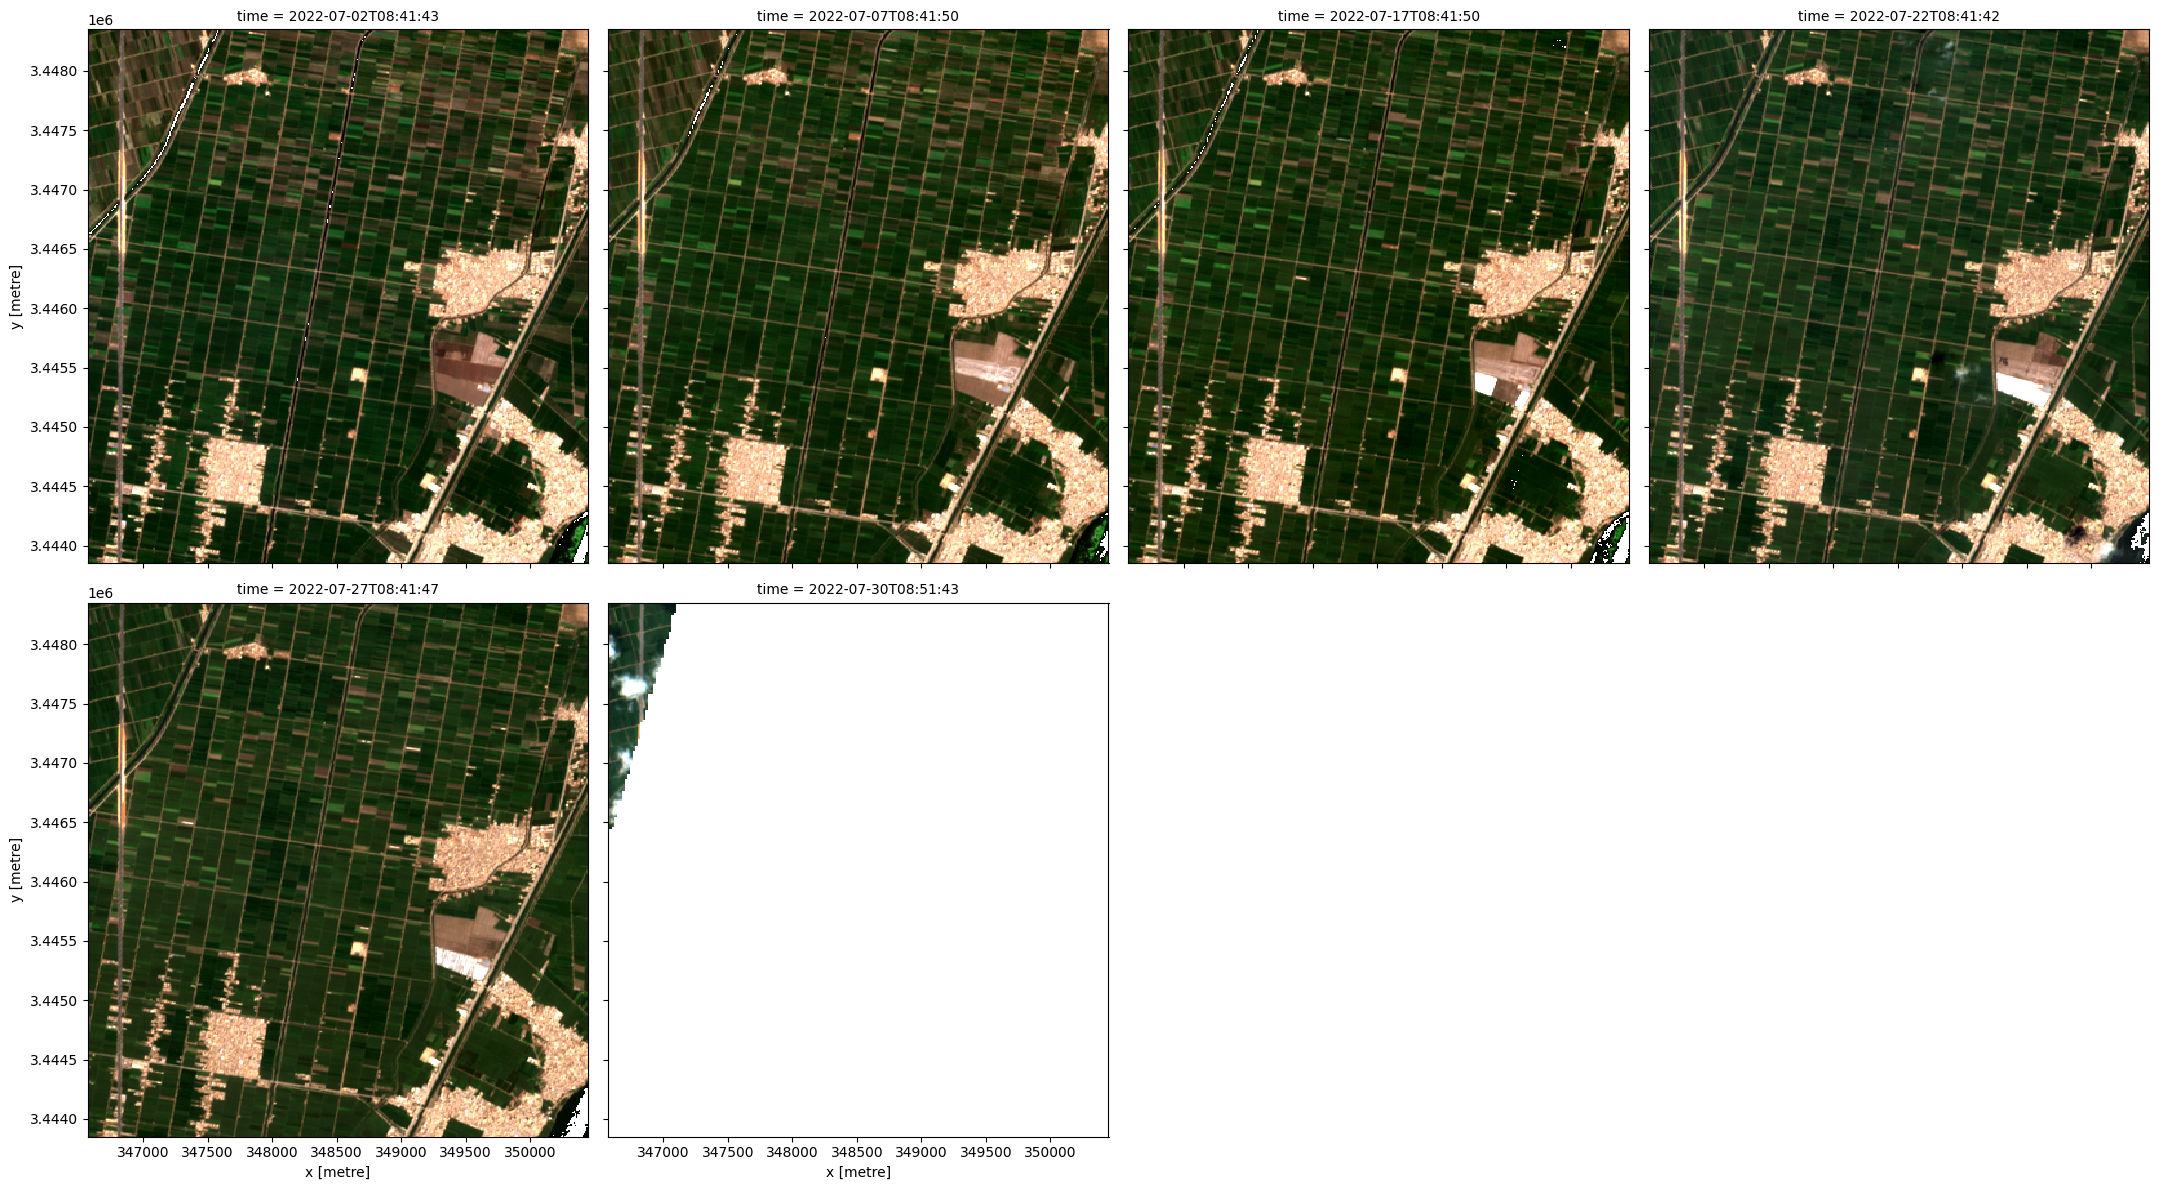

In [5]:
# Plot as an RGB image
rgb(ds, col='time')

### Calculting EVI using the `calculate_indeces`

The Enhanced Vegetation Index requires the `red`, `nir` and `blue` bands.
The formula is

$$
\begin{aligned}
\text{EVI} & = \frac{2.5 \times (\text{NIR} - \text{Red})}{(\text{NIR} + 6 \times \text{Red} - 7.5 \times \text{Blue} + 1)} \\
\end{aligned}
$$

The indices is available through the [calculate_indices](../Frequently_used_code/Calculating_band_indices.ipynb) function, imported from [deafrica_tools.bandindices](https://docs.digitalearthafrica.org/en/latest/sandbox/notebooks/Tools/gen/deafrica_tools.bandindices.html).
Here, we use `satellite_mission='s2'` since we're working with Sentinel-2 data.


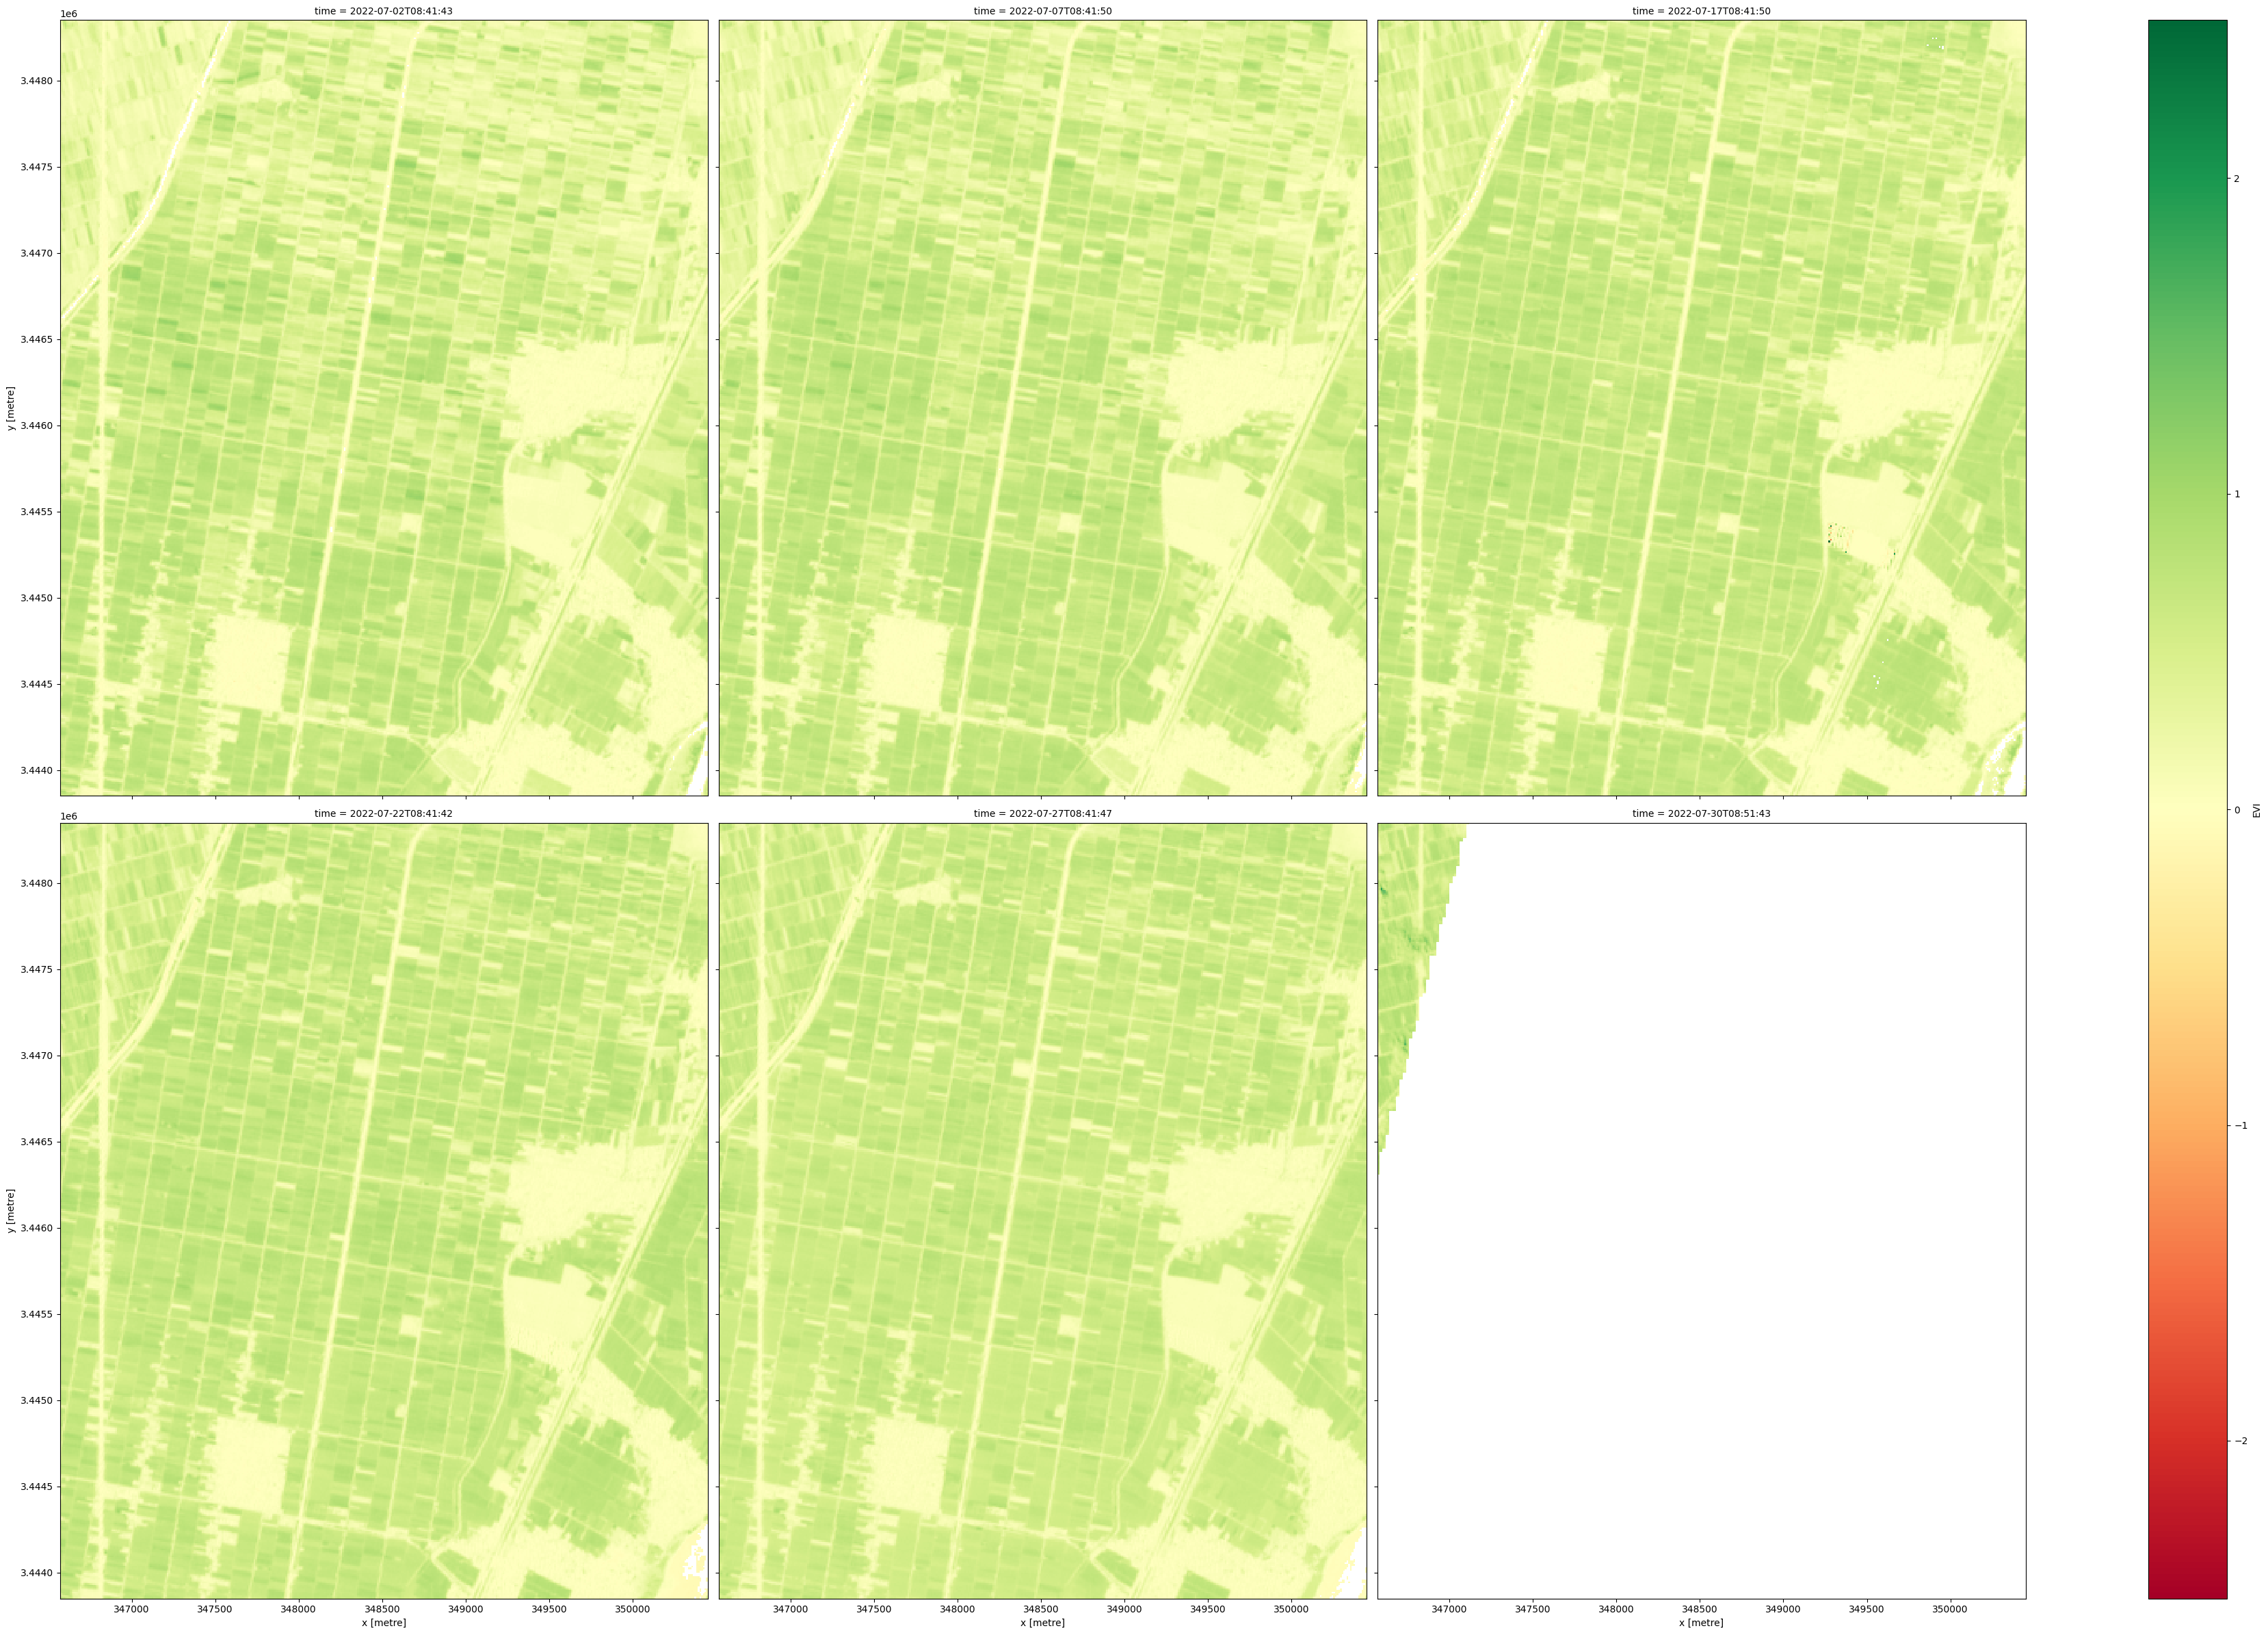

In [6]:
# Calculate NDVI using `calculate indices`
ds = calculate_indices(ds, index='EVI', satellite_mission='s2')

#The vegetation proxy index should now appear as a data variable, 
#along with the loaded measurements, in the `ds` object.

# Plot the results 
ds.EVI.plot(col='time', cmap='RdYlGn', size=12, col_wrap=3)

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [7]:
print(datacube.__version__)

1.8.8


**Last Tested:**

In [8]:
from datetime import date
print(date.today())

2023-03-26
